In [ ]:
file= "/content/drive/MyDrive/Colab Notebooks/projects/Bangalore house price/BH_processed.csv"

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
data = pd.read_csv(file)
df = data.copy()
df.shape

(7529, 11)

In [ ]:
df.head()

,area_type,availability,location,size,total_sqft,bath,balcony,price,BHK,price_per_sqft,new_location
0,Super built-up Area,May,1st Block Jayanagar,4 BHK,2850.0,4.0,1.0,428.0,4,15017.543860,south
1,Super built-up Area,Jun,1st Block Jayanagar,3 BHK,1630.0,3.0,2.0,194.0,3,11901.840491,south
2,Super built-up Area,Dec,1st Block Jayanagar,6 BHK,1200.0,6.0,2.0,125.0,6,10416.666667,south
3,Super built-up Area,Ready To Move,1st Block Jayanagar,3 BHK,1875.0,2.0,3.0,235.0,3,12533.333333,south
4,Plot Area,Ready To Move,1st Block Jayanagar,7 Bedroom,930.0,4.0,2.0,85.0,7,9139.784946,south


- we can drop area_type,availability,size,price_per_sqft and balcony since they wont be much of an help to model 
- we will first do one hot encoding on location and again create a copy and find the accuracy on new_location to check which one will be better.

In [ ]:
def outlier(feature):
  df[feature] = np.log(df[feature])
  sns.distplot(df[feature])
  plt.title("Distribution plot after Log transformation")
  sns.despine()
  plt.show() 

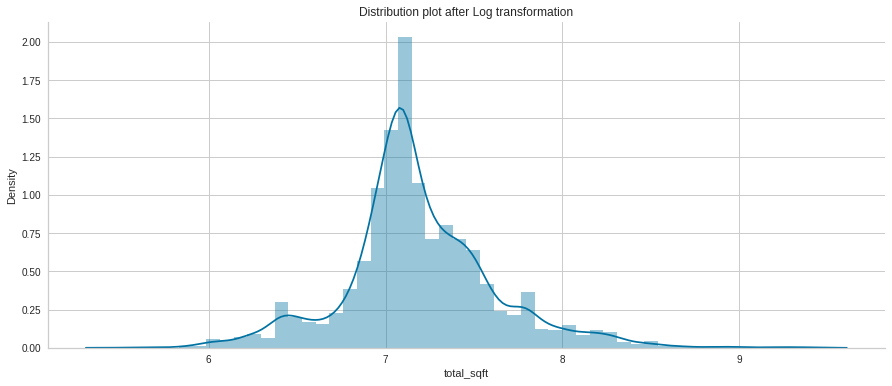

In [ ]:
outlier('total_sqft')

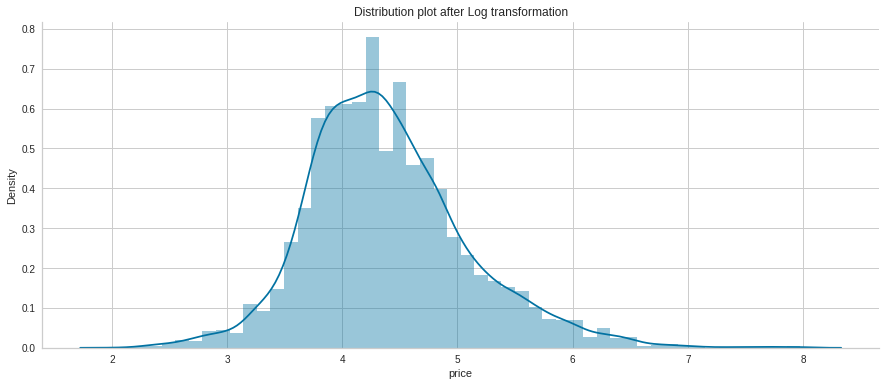

In [ ]:
outlier('price')

- Normally for a regression it is not mandatory that transformation must be done to make the data more normally distributed.
- However after checking the result on both non-transformed data and transformed data,transformed data performed better

In [ ]:
df.drop(['area_type',	'availability','price_per_sqft','balcony','size','new_location'],axis=1,inplace=True)
df.head()

,location,total_sqft,bath,price,BHK
0,1st Block Jayanagar,7.955074,4.0,6.059123,4
1,1st Block Jayanagar,7.396335,3.0,5.267858,3
2,1st Block Jayanagar,7.090077,6.0,4.828314,6
3,1st Block Jayanagar,7.536364,2.0,5.459586,3
4,1st Block Jayanagar,6.835185,4.0,4.442651,7


- let us create dummies for location

In [ ]:
dummies = pd.get_dummies(df.location,drop_first=True)
dummies.head()

,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,AECS Layout,Abbigere,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df2 = pd.concat([df,dummies],axis='columns')
df2.head()

,location,total_sqft,bath,price,BHK,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Phase JP Nagar,6th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,1st Block Jayanagar,7.955074,4.0,6.059123,4,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1st Block Jayanagar,7.396335,3.0,5.267858,3,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1st Block Jayanagar,7.090077,6.0,4.828314,6,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1st Block Jayanagar,7.536364,2.0,5.459586,3,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1st Block Jayanagar,6.835185,4.0,4.442651,7,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df2.drop('location',axis=1,inplace=True)

- creating our dependent and independent features

In [ ]:
X = df2.drop('price',axis=1)
y = df2['price']

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [ ]:
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(6023, 238) (6023,)
(1506, 238) (1506,)


### Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression

model=LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

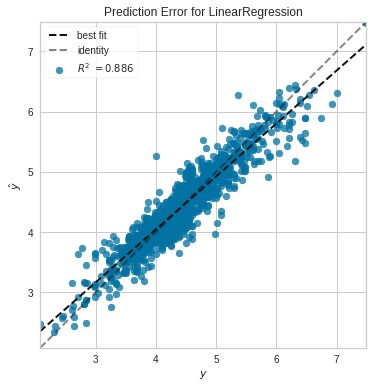

In [ ]:
from yellowbrick.regressor import PredictionError
visualizer = PredictionError(model)
visualizer.fit(X_train, y_train) 
visualizer.score(X_test, y_test)
visualizer.show();  

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
y_actual = y_test.to_numpy()
results = np.concatenate((np.exp(y_pred.reshape(len(y_pred),1)),np.exp(y_actual.reshape(len(y_actual),1))),1)
result = pd.DataFrame(results,columns=['predicted','actual'])
result.head(10)

,predicted,actual
0,48.994631,40.54
1,76.483594,95.00
2,117.041041,121.00
3,67.321610,78.00
4,49.143230,57.00
5,35.618809,32.50
6,36.523056,39.00
7,85.608500,120.00
8,93.884404,105.00
9,135.141187,205.00


In [ ]:
from sklearn.metrics import r2_score
r2_score(y_actual,y_pred)

0.8860599877617269

In [ ]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_pred,y_actual)
rmse = np.sqrt(mse)
rmse

0.23201153623968662

### Cross validation

In [ ]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

cross_val_score(LinearRegression(), X, y, cv=cv)

array([0.88605999, 0.88051924, 0.87272829, 0.8799404 , 0.86980927])

- After applying randomforest and decision tree they both gave us a score of 80 and 86 respectively so we will proceed with Linear regression

what can we do to make the performance better:
- get a bigger dataset
- having features on the dataset which actually has some impact on price of an house
- we can apply hyperparameter tuning on the model which may increase the performance
- we just tried with 3 models we can also try with multiple models to see if we any model will give a better result than linear regression.
- creating a neural network since they does increase the performance of a model, however for a smaller dataset ml models performs better.

<p align='center'><img src ="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcS5-M2lVe8L2_cANvFgK0H1dTgJnDw7JVa3jIXCx7rJai755V5H2QRCg1k6Wva-jgCtzLw&usqp=CAU" />
<h3 align='center'>This concludes our notebook,let me finish by saying a line <br> " Life is road that must be travelled step by step anyone who tries to jump to the other side of the road will find themselves back at the beginning of the road "</h3>